Imports

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from sklearn import preprocessing
import scipy
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

This cell loads the data set assigns column labels and assigns dummy values to variables.

In [4]:
address = 'C:/Users/derri/Desktop/UH Fall 2020/COSC 3337/Group Project/Project1_Part1_Group19/StudentsPerformance.csv'
data = pd.read_csv(address)
data.columns = ['gender','race_ethnicity','parental_education','lunch','test_prep','math','reading','writing']
#print(data)
le = preprocessing.LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['race_ethnicity']=le.fit_transform(data['race_ethnicity'])
data['lunch']=le.fit_transform(data['lunch'])
data['test_prep']=le.fit_transform(data['test_prep'])
data.loc[data.parental_education=='some high school','parental_education']=0
data.loc[data.parental_education=='high school','parental_education']=1
data.loc[data.parental_education=='some college','parental_education']=2
data.loc[data.parental_education=='associate\'s degree','parental_education']=3
data.loc[data.parental_education=='bachelor\'s degree','parental_education']=4
data.loc[data.parental_education=='master\'s degree','parental_education']=5
data.loc[data.lunch==0,'lunch']=3
data.loc[data.lunch==1,'lunch']=2
data['lunch']-=2
data.loc[data.test_prep==0,'test_prep']=3
data.loc[data.test_prep==1,'test_prep']=2
data['test_prep']-=2
print(data)
# gender - (0=female, 1=male)
# race_ethnicity - (5 groups but actually race/ethnicity unknown)
# parental_education - (6 groups: 0=some high school, 1=high school, 2=some college, 3=associates, 4=bachelors, 5=masters)
# lunch - (0=standard, 1=free/reduced)
# test_prep - (0=none, 1=completed)
# math - integer scores from 0-100
# reading - integer scores from 0-100
# writing - integer scores from 0-100

     gender  race_ethnicity parental_education  lunch  test_prep  math  \
0         0               1                  4      0          0    72   
1         0               2                  2      0          1    69   
2         0               1                  5      0          0    90   
3         1               0                  3      1          0    47   
4         1               2                  2      0          0    76   
..      ...             ...                ...    ...        ...   ...   
995       0               4                  5      0          1    88   
996       1               2                  1      1          0    62   
997       0               2                  1      1          1    59   
998       0               3                  2      0          1    68   
999       0               3                  2      1          0    77   

     reading  writing  
0         72       74  
1         90       88  
2         95       93  
3         57   

This cell plots pie charts of each predictor to show proportions of each value.

<Figure size 1440x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1a0d0006820>,
 [Text(-1.0982417038160106, -0.06217041096298418, 'male'),
  Text(1.0982417038160106, 0.06217041096298404, 'female')],
 [Text(-0.5990409293541875, -0.03391113325253682, '51.8%'),
  Text(0.5990409293541875, 0.033911133252536745, '48.2%')])

Text(0.5, 1.0, 'Gender')

([<matplotlib.patches.Wedge at 0x1a0d0067160>,
 [Text(-0.30357017606109415, 1.057281962489778, 'A'),
  Text(-1.0067652908788918, 0.44319707702278505, 'B'),
  Text(-0.4145580984795792, -1.018892331399641, 'C'),
  Text(1.0904383961276194, -0.14472078029994487, 'D'),
  Text(0.4683572225853328, 0.9953097568356061, 'E')],
 [Text(-0.16558373239696045, 0.5766992522671516, '8.9%'),
  Text(-0.5491447041157591, 0.24174386019424637, '19.0%'),
  Text(-0.2261225991706795, -0.5557594534907132, '31.9%'),
  Text(0.5947845797059742, -0.07893860743633355, '26.2%'),
  Text(0.255467575955636, 0.5428962310012396, '14.0%')])

Text(0.5, 1.0, 'Race/Ethnicity')

([<matplotlib.patches.Wedge at 0x1a0d00ad3a0>,
 [Text(-0.5864887977972317, 0.9306078067899269, 'some high school'),
  Text(-1.0842090516731513, -0.1857168066438955, 'high school'),
  Text(-0.08285949963670729, -1.0968747892626372, 'some college'),
  Text(1.0687949021141825, -0.26014891353748826, 'associates'),
  Text(0.7428660925790179, 0.8112644257554883, 'bachelors'),
  Text(0.20272389463327073, 1.0811581857178525, 'masters')],
 [Text(-0.31990298061667183, 0.507604258249051, '17.9%'),
  Text(-0.5913867554580825, -0.10130007635121571, '19.6%'),
  Text(-0.04519609071093124, -0.598295339597802, '22.6%'),
  Text(0.5829790375168267, -0.1418994073840845, '22.2%'),
  Text(0.40519968686128244, 0.4425078685939027, '11.8%'),
  Text(0.11057666979996585, 0.5897226467551923, '5.9%')])

Text(0.5, 1.0, 'Parental Education')

([<matplotlib.patches.Wedge at 0x1a0d00ffca0>,
 [Text(-0.9878303623344903, -0.4839330276496014, 'standard'),
  Text(0.9878304076435662, 0.4839329351622454, 'free/reduced')],
 [Text(-0.5388165612733583, -0.26396346962705525, '64.5%'),
  Text(0.5388165859873997, 0.2639634191794065, '35.5%')])

Text(0.5, 1.0, 'Lunch')

([<matplotlib.patches.Wedge at 0x1a0d01435e0>,
 [Text(-0.9923473261553902, -0.4746017111981876, 'none'),
  Text(0.9923472817199666, 0.47460180410844777, 'completed')],
 [Text(-0.5412803597211219, -0.2588736606535568, '64.2%'),
  Text(0.5412803354836181, 0.2588737113318806, '35.8%')])

Text(0.5, 1.0, 'Test Prep')

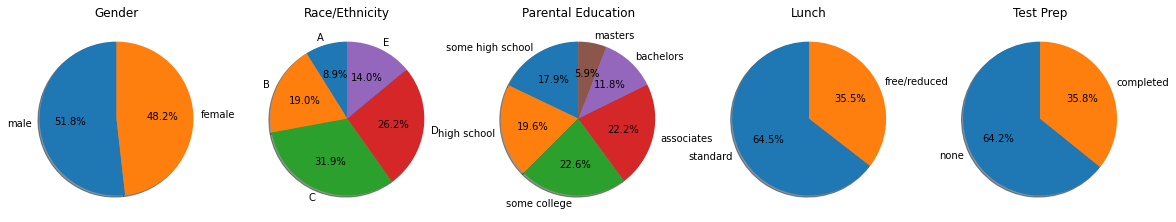

In [5]:
plt.figure(figsize=(20,6));
plt.subplot(151)
gen,genCounts =np.unique(data.gender,return_counts=True)
plt.pie(genCounts,labels = ['male','female'],autopct='%1.1f%%',shadow=True,startangle = 90)
plt.title('Gender')
plt.subplot(152)
race,raceCounts =np.unique(data.race_ethnicity,return_counts=True)
plt.pie(raceCounts,labels = ['A','B','C','D','E'],autopct='%1.1f%%',shadow=True,startangle = 90)
plt.title('Race/Ethnicity')
plt.subplot(153)
par,parCounts =np.unique(data.parental_education,return_counts=True)
plt.pie(parCounts,labels = ['some high school','high school','some college','associates','bachelors','masters'],autopct='%1.1f%%',shadow=True,startangle = 90)
plt.title('Parental Education')
plt.subplot(154)
lun,lunCounts =np.unique(data.lunch,return_counts=True)
plt.pie(lunCounts,labels = ['standard','free/reduced'],autopct='%1.1f%%',shadow=True,startangle = 90)
plt.title('Lunch')
plt.subplot(155)
tpc,tpcCounts =np.unique(data.test_prep,return_counts=True)
plt.pie(tpcCounts,labels = ['none','completed'],autopct='%1.1f%%',shadow=True,startangle = 90)
plt.title('Test Prep')

This cell calculates the average of math, reading, and writing scores and then adds the average to the data frame as a new column.

In [6]:
average = np.mean(data.loc[:,['math','reading','writing']],axis=1)
print(average)

data['average'] = average
print(data)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64
     gender  race_ethnicity parental_education  lunch  test_prep  math  \
0         0               1                  4      0          0    72   
1         0               2                  2      0          1    69   
2         0               1                  5      0          0    90   
3         1               0                  3      1          0    47   
4         1               2                  2      0          0    76   
..      ...             ...                ...    ...        ...   ...   
995       0               4                  5      0          1    88   
996       1               2                  1      1          0    62   
997       0               2                  1      1          1    59   
998       0               3                 

This cell calculates and outputs the mean and standard deviation of the average test scores.

In [7]:
meanScore = np.mean(average)
print('Mean:')
print(meanScore)
stdScore = np.std(average)
print('Standard deviation:')
print(stdScore)

Mean:
67.77066666666664
Standard deviation:
14.25019553861943


This cell plots side-by-side boxplots of average test score separated by gender, lunch, and test_prep values.

<Figure size 1152x432 with 0 Axes>

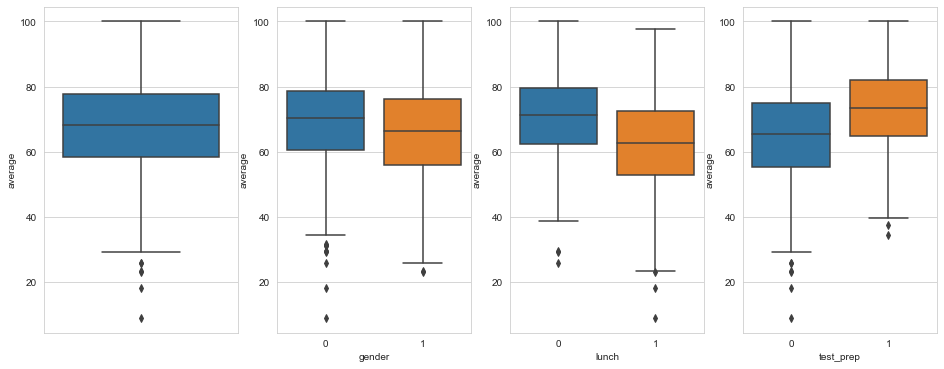

In [8]:
sb.set_style('whitegrid')
plt.figure(figsize=(16,6));
plt.subplot(141);
sb.boxplot(y = 'average',data=data)
plt.subplot(142);
sb.boxplot(x='gender',y = 'average',data=data)
plt.subplot(143);
sb.boxplot(x='lunch',y = 'average',data=data)
plt.subplot(144);
sb.boxplot(x='test_prep',y = 'average',data=data)

This cell plots boxplots for average test score separated by race/ethnicity and parental level of education.

<Figure size 864x288 with 0 Axes>

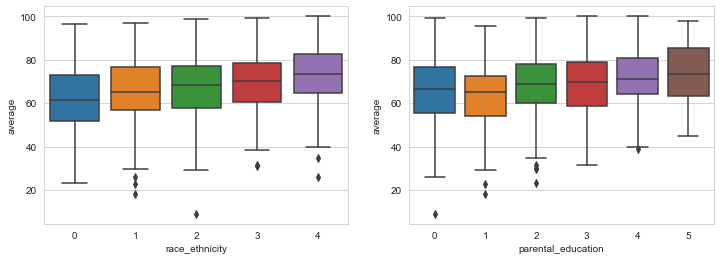

In [9]:
plt.figure(figsize=(12,4));
plt.subplot(121);
sb.boxplot(x='race_ethnicity',y = 'average',data=data)
plt.subplot(122);
sb.boxplot(x='parental_education',y = 'average',data=data)

This cell plots histograms of test scores, both individual scores and average score.

<Figure size 1152x432 with 0 Axes>

Text(0.5, 1.0, 'Math')

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Reading')

(array([  4.,   7.,  22.,  64., 140., 182., 237., 168., 120.,  56.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Writing')

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Average')

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

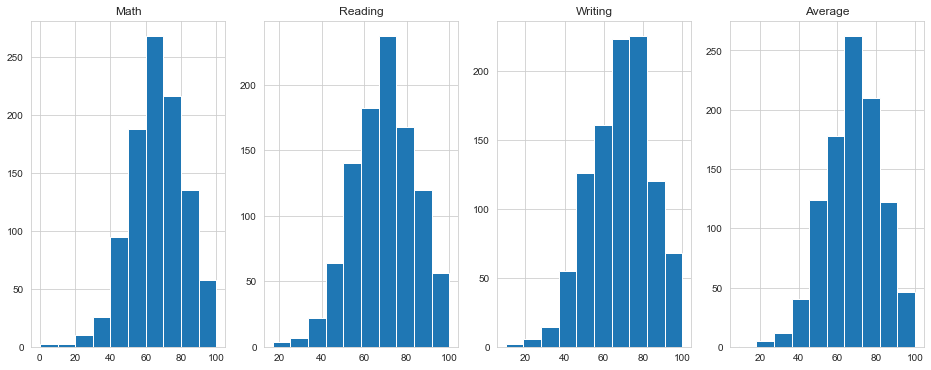

In [10]:
plt.figure(figsize=(16,6));
plt.subplot(141)
plt.title('Math');
plt.hist(data['math'])
plt.subplot(142)
plt.title('Reading');
plt.hist(data['reading'])
plt.subplot(143)
plt.title('Writing');
plt.hist(data['writing'])
plt.subplot(144)
plt.title('Average');
plt.hist(data['average'])

Making a class variable that has one of 5 possible letter grades depending on the student's average test score.

In [60]:
data['letter'] = data['average']
data.loc[(data.average >= 0),'letter']='F'
data.loc[(data.average >= 60),'letter']='D'
data.loc[(data.average >= 70),'letter']='C'
data.loc[(data.average >= 80),'letter']='B'
data.loc[(data.average >= 90),'letter']='A'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail
0,0,1,4,0,0,72,72,74,72.666667,C,pass
1,0,2,2,0,1,69,90,88,82.333333,B,pass
2,0,1,5,0,0,90,95,93,92.666667,A,pass
3,1,0,3,1,0,47,57,44,49.333333,F,fail
4,1,2,2,0,0,76,78,75,76.333333,C,pass
...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass
996,1,2,1,1,0,62,55,55,57.333333,F,fail
997,0,2,1,1,1,59,71,65,65.000000,D,pass
998,0,3,2,0,1,68,78,77,74.333333,C,pass


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being the letter grade for the student's average test score.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['letter'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['letter'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.4757142857142857
Accuracy for k = 1 on the test set is 0.2733333333333333


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.43
Accuracy for k = 2 on the test set is 0.25666666666666665


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.4471428571428571
Accuracy for k = 3 on the test set is 0.27666666666666667


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.45285714285714285
Accuracy for k = 4 on the test set is 0.28


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.45
Accuracy for k = 5 on the test set is 0.24333333333333335


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.4657142857142857
Accuracy for k = 6 on the test set is 0.28


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.4614285714285714
Accuracy for k = 7 on the test set is 0.26


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.4642857142857143
Accuracy for k = 8 on the test set is 0.2833333333333333


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.4514285714285714
Accuracy for k = 9 on the test set is 0.2833333333333333


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.4471428571428571
Accuracy for k = 10 on the test set is 0.29333333333333333


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.44857142857142857
Accuracy for k = 11 on the test set is 0.29333333333333333


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.4357142857142857
Accuracy for k = 12 on the test set is 0.30666666666666664


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.4342857142857143
Accuracy for k = 13 on the test set is 0.3233333333333333


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.43142857142857144
Accuracy for k = 14 on the test set is 0.31333333333333335


Running decision tree classifier on this dataset against the letter grade for each student's average test score, reporting the accuracy on the training and test sets.

In [50]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.5414285714285715
Accuracy of the decision tree model on the test set: 0.26


Creating another class variable based on the student's average test grade, but only splitting into passing or failing rather than letter grades.

In [52]:
data['passOrFail'] = data['average']
data.loc[(data.average >= 0),'passOrFail']='fail'
data.loc[(data.average >= 60),'passOrFail']='pass'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail
0,0,1,4,0,0,72,72,74,72.666667,C,pass
1,0,2,2,0,1,69,90,88,82.333333,B,pass
2,0,1,5,0,0,90,95,93,92.666667,A,pass
3,1,0,3,1,0,47,57,44,49.333333,F,fail
4,1,2,2,0,0,76,78,75,76.333333,C,pass
...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass
996,1,2,1,1,0,62,55,55,57.333333,F,fail
997,0,2,1,1,1,59,71,65,65.000000,D,pass
998,0,3,2,0,1,68,78,77,74.333333,C,pass


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being whether the student's average test score is passing or failing.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['passOrFail'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['passOrFail'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.7285714285714285
Accuracy for k = 1 on the test set is 0.6233333333333333


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.73
Accuracy for k = 2 on the test set is 0.5966666666666667


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.7885714285714286
Accuracy for k = 3 on the test set is 0.68


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.7557142857142857
Accuracy for k = 4 on the test set is 0.6433333333333333


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.7928571428571428
Accuracy for k = 5 on the test set is 0.6933333333333334


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.7742857142857142
Accuracy for k = 6 on the test set is 0.6533333333333333


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.7828571428571428
Accuracy for k = 7 on the test set is 0.69


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.7742857142857142
Accuracy for k = 8 on the test set is 0.6733333333333333


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.7671428571428571
Accuracy for k = 9 on the test set is 0.69


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.7714285714285715
Accuracy for k = 10 on the test set is 0.6866666666666666


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.7585714285714286
Accuracy for k = 11 on the test set is 0.6866666666666666


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.7614285714285715
Accuracy for k = 12 on the test set is 0.6766666666666666


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.7657142857142857
Accuracy for k = 13 on the test set is 0.7033333333333334


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.7714285714285715
Accuracy for k = 14 on the test set is 0.7133333333333334


Running decision tree classifier on this dataset against whether each student's average test score is passing or failing, reporting the accuracy on the training and test sets.

In [55]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.81
Accuracy of the decision tree model on the test set: 0.6766666666666666


Making a class variable that has one of 5 possible letter grades depending on the student's math test score.

In [65]:
data['math_letter'] = data['average']
data.loc[(data.math >= 0),'math_letter']='F'
data.loc[(data.math >= 60),'math_letter']='D'
data.loc[(data.math >= 70),'math_letter']='C'
data.loc[(data.math >= 80),'math_letter']='B'
data.loc[(data.math >= 90),'math_letter']='A'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail,math_letter
0,0,1,4,0,0,72,72,74,72.666667,C,pass,C
1,0,2,2,0,1,69,90,88,82.333333,B,pass,D
2,0,1,5,0,0,90,95,93,92.666667,A,pass,A
3,1,0,3,1,0,47,57,44,49.333333,F,fail,F
4,1,2,2,0,0,76,78,75,76.333333,C,pass,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass,B
996,1,2,1,1,0,62,55,55,57.333333,F,fail,D
997,0,2,1,1,1,59,71,65,65.000000,D,pass,F
998,0,3,2,0,1,68,78,77,74.333333,C,pass,D


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being the letter grade for the student's math test score.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['math_letter'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['math_letter'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.48
Accuracy for k = 1 on the test set is 0.28


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.4442857142857143
Accuracy for k = 2 on the test set is 0.26


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.4685714285714286
Accuracy for k = 3 on the test set is 0.27666666666666667


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.48428571428571426
Accuracy for k = 4 on the test set is 0.28


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.4828571428571429
Accuracy for k = 5 on the test set is 0.2866666666666667


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.46285714285714286
Accuracy for k = 6 on the test set is 0.32


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.45571428571428574
Accuracy for k = 7 on the test set is 0.33666666666666667


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.4471428571428571
Accuracy for k = 8 on the test set is 0.33666666666666667


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.4471428571428571
Accuracy for k = 9 on the test set is 0.37333333333333335


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.44285714285714284
Accuracy for k = 10 on the test set is 0.31333333333333335


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.4357142857142857
Accuracy for k = 11 on the test set is 0.3333333333333333


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.43
Accuracy for k = 12 on the test set is 0.3433333333333333


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.4328571428571429
Accuracy for k = 13 on the test set is 0.3233333333333333


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.41714285714285715
Accuracy for k = 14 on the test set is 0.3233333333333333


Running decision tree classifier on this dataset against the letter grade for each student's math test score, reporting the accuracy on the training and test sets.

In [67]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.5542857142857143
Accuracy of the decision tree model on the test set: 0.26666666666666666


Creating another class variable based on the student's math test grade, but only splitting into passing or failing rather than letter grades.

In [68]:
data['math_passOrFail'] = data['average']
data.loc[(data.math >= 0),'math_passOrFail']='fail'
data.loc[(data.math >= 60),'math_passOrFail']='pass'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail,math_letter,math_passOrFail
0,0,1,4,0,0,72,72,74,72.666667,C,pass,C,pass
1,0,2,2,0,1,69,90,88,82.333333,B,pass,D,pass
2,0,1,5,0,0,90,95,93,92.666667,A,pass,A,pass
3,1,0,3,1,0,47,57,44,49.333333,F,fail,F,fail
4,1,2,2,0,0,76,78,75,76.333333,C,pass,C,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass,B,pass
996,1,2,1,1,0,62,55,55,57.333333,F,fail,D,pass
997,0,2,1,1,1,59,71,65,65.000000,D,pass,F,fail
998,0,3,2,0,1,68,78,77,74.333333,C,pass,D,pass


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being whether the student's math test score is passing or failing.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [69]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['math_passOrFail'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['math_passOrFail'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.7057142857142857
Accuracy for k = 1 on the test set is 0.57


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.6771428571428572
Accuracy for k = 2 on the test set is 0.51


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.7471428571428571
Accuracy for k = 3 on the test set is 0.6


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.7242857142857143
Accuracy for k = 4 on the test set is 0.5833333333333334


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.7457142857142857
Accuracy for k = 5 on the test set is 0.6066666666666667


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.72
Accuracy for k = 6 on the test set is 0.5933333333333334


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.7471428571428571
Accuracy for k = 7 on the test set is 0.6433333333333333


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.7328571428571429
Accuracy for k = 8 on the test set is 0.63


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.7357142857142858
Accuracy for k = 9 on the test set is 0.64


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.7371428571428571
Accuracy for k = 10 on the test set is 0.6266666666666667


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.7357142857142858
Accuracy for k = 11 on the test set is 0.6233333333333333


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.7314285714285714
Accuracy for k = 12 on the test set is 0.6433333333333333


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.7271428571428571
Accuracy for k = 13 on the test set is 0.6433333333333333


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.7285714285714285
Accuracy for k = 14 on the test set is 0.6433333333333333


Running decision tree classifier on this dataset against whether each student's math test score is passing or failing, reporting the accuracy on the training and test sets.

In [70]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.78
Accuracy of the decision tree model on the test set: 0.5866666666666667


Making a class variable that has one of 5 possible letter grades depending on the student's reading test score.

In [71]:
data['read_letter'] = data['average']
data.loc[(data.reading >= 0),'read_letter']='F'
data.loc[(data.reading >= 60),'read_letter']='D'
data.loc[(data.reading >= 70),'read_letter']='C'
data.loc[(data.reading >= 80),'read_letter']='B'
data.loc[(data.reading >= 90),'read_letter']='A'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail,math_letter,math_passOrFail,read_letter
0,0,1,4,0,0,72,72,74,72.666667,C,pass,C,pass,C
1,0,2,2,0,1,69,90,88,82.333333,B,pass,D,pass,A
2,0,1,5,0,0,90,95,93,92.666667,A,pass,A,pass,A
3,1,0,3,1,0,47,57,44,49.333333,F,fail,F,fail,F
4,1,2,2,0,0,76,78,75,76.333333,C,pass,C,pass,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass,B,pass,A
996,1,2,1,1,0,62,55,55,57.333333,F,fail,D,pass,F
997,0,2,1,1,1,59,71,65,65.000000,D,pass,F,fail,C
998,0,3,2,0,1,68,78,77,74.333333,C,pass,D,pass,C


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being the letter grade for the student's reading test score.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [72]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['read_letter'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['read_letter'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.44857142857142857
Accuracy for k = 1 on the test set is 0.21


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.4157142857142857
Accuracy for k = 2 on the test set is 0.23


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.44285714285714284
Accuracy for k = 3 on the test set is 0.22333333333333333


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.4585714285714286
Accuracy for k = 4 on the test set is 0.22333333333333333


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.45714285714285713
Accuracy for k = 5 on the test set is 0.22


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.4471428571428571
Accuracy for k = 6 on the test set is 0.22333333333333333


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.43857142857142856
Accuracy for k = 7 on the test set is 0.25


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.4228571428571429
Accuracy for k = 8 on the test set is 0.25666666666666665


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.4157142857142857
Accuracy for k = 9 on the test set is 0.25666666666666665


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.4257142857142857
Accuracy for k = 10 on the test set is 0.25666666666666665


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.41714285714285715
Accuracy for k = 11 on the test set is 0.24333333333333335


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.40285714285714286
Accuracy for k = 12 on the test set is 0.2733333333333333


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.4057142857142857
Accuracy for k = 13 on the test set is 0.28


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.38571428571428573
Accuracy for k = 14 on the test set is 0.27


Running decision tree classifier on this dataset against the letter grade for each student's reading test score, reporting the accuracy on the training and test sets.

In [73]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.5357142857142857
Accuracy of the decision tree model on the test set: 0.2633333333333333


Creating another class variable based on the student's reading test grade, but only splitting into passing or failing rather than letter grades.

In [74]:
data['read_passOrFail'] = data['average']
data.loc[(data.reading >= 0),'read_passOrFail']='fail'
data.loc[(data.reading >= 60),'read_passOrFail']='pass'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail,math_letter,math_passOrFail,read_letter,read_passOrFail
0,0,1,4,0,0,72,72,74,72.666667,C,pass,C,pass,C,pass
1,0,2,2,0,1,69,90,88,82.333333,B,pass,D,pass,A,pass
2,0,1,5,0,0,90,95,93,92.666667,A,pass,A,pass,A,pass
3,1,0,3,1,0,47,57,44,49.333333,F,fail,F,fail,F,fail
4,1,2,2,0,0,76,78,75,76.333333,C,pass,C,pass,C,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass,B,pass,A,pass
996,1,2,1,1,0,62,55,55,57.333333,F,fail,D,pass,F,fail
997,0,2,1,1,1,59,71,65,65.000000,D,pass,F,fail,C,pass
998,0,3,2,0,1,68,78,77,74.333333,C,pass,D,pass,C,pass


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being whether the student's reading test score is passing or failing.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['read_passOrFail'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['read_passOrFail'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.77
Accuracy for k = 1 on the test set is 0.6466666666666666


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.7285714285714285
Accuracy for k = 2 on the test set is 0.6033333333333334


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.8028571428571428
Accuracy for k = 3 on the test set is 0.6966666666666667


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.7614285714285715
Accuracy for k = 4 on the test set is 0.6733333333333333


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.78
Accuracy for k = 5 on the test set is 0.7033333333333334


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.7714285714285715
Accuracy for k = 6 on the test set is 0.69


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.7814285714285715
Accuracy for k = 7 on the test set is 0.7266666666666667


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.7742857142857142
Accuracy for k = 8 on the test set is 0.6966666666666667


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.7728571428571429
Accuracy for k = 9 on the test set is 0.73


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.7714285714285715
Accuracy for k = 10 on the test set is 0.7166666666666667


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.7557142857142857
Accuracy for k = 11 on the test set is 0.73


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.7657142857142857
Accuracy for k = 12 on the test set is 0.7266666666666667


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.7714285714285715
Accuracy for k = 13 on the test set is 0.74


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.77
Accuracy for k = 14 on the test set is 0.7166666666666667


Running decision tree classifier on this dataset against whether each student's reading test score is passing or failing, reporting the accuracy on the training and test sets.

In [76]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.8114285714285714
Accuracy of the decision tree model on the test set: 0.6666666666666666


Making a class variable that has one of 5 possible letter grades depending on the student's writing test score.

In [77]:
data['write_letter'] = data['average']
data.loc[(data.writing >= 0),'write_letter']='F'
data.loc[(data.writing >= 60),'write_letter']='D'
data.loc[(data.writing >= 70),'write_letter']='C'
data.loc[(data.writing >= 80),'write_letter']='B'
data.loc[(data.writing >= 90),'write_letter']='A'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail,math_letter,math_passOrFail,read_letter,read_passOrFail,write_letter
0,0,1,4,0,0,72,72,74,72.666667,C,pass,C,pass,C,pass,C
1,0,2,2,0,1,69,90,88,82.333333,B,pass,D,pass,A,pass,B
2,0,1,5,0,0,90,95,93,92.666667,A,pass,A,pass,A,pass,A
3,1,0,3,1,0,47,57,44,49.333333,F,fail,F,fail,F,fail,F
4,1,2,2,0,0,76,78,75,76.333333,C,pass,C,pass,C,pass,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass,B,pass,A,pass,A
996,1,2,1,1,0,62,55,55,57.333333,F,fail,D,pass,F,fail,F
997,0,2,1,1,1,59,71,65,65.000000,D,pass,F,fail,C,pass,D
998,0,3,2,0,1,68,78,77,74.333333,C,pass,D,pass,C,pass,C


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being the letter grade for the student's writing test score.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['write_letter'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['write_letter'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.48714285714285716
Accuracy for k = 1 on the test set is 0.27666666666666667


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.46285714285714286
Accuracy for k = 2 on the test set is 0.26666666666666666


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.4828571428571429
Accuracy for k = 3 on the test set is 0.24666666666666667


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.4928571428571429
Accuracy for k = 4 on the test set is 0.27


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.48857142857142855
Accuracy for k = 5 on the test set is 0.2833333333333333


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.4757142857142857
Accuracy for k = 6 on the test set is 0.2833333333333333


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.4757142857142857
Accuracy for k = 7 on the test set is 0.29333333333333333


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.4757142857142857
Accuracy for k = 8 on the test set is 0.28


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.4614285714285714
Accuracy for k = 9 on the test set is 0.2833333333333333


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.4657142857142857
Accuracy for k = 10 on the test set is 0.2833333333333333


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.4471428571428571
Accuracy for k = 11 on the test set is 0.31


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.44571428571428573
Accuracy for k = 12 on the test set is 0.31666666666666665


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.43142857142857144
Accuracy for k = 13 on the test set is 0.31666666666666665


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.42714285714285716
Accuracy for k = 14 on the test set is 0.2966666666666667


Running decision tree classifier on this dataset against the letter grade for each student's writing test score, reporting the accuracy on the training and test sets.

In [79]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.5557142857142857
Accuracy of the decision tree model on the test set: 0.2733333333333333


Creating another class variable based on the student's writing test grade, but only splitting into passing or failing rather than letter grades.

In [80]:
data['write_passOrFail'] = data['average']
data.loc[(data.writing >= 0),'write_passOrFail']='fail'
data.loc[(data.writing >= 60),'write_passOrFail']='pass'
data

,gender,race_ethnicity,parental_education,lunch,test_prep,math,reading,writing,average,letter,passOrFail,math_letter,math_passOrFail,read_letter,read_passOrFail,write_letter,write_passOrFail
0,0,1,4,0,0,72,72,74,72.666667,C,pass,C,pass,C,pass,C,pass
1,0,2,2,0,1,69,90,88,82.333333,B,pass,D,pass,A,pass,B,pass
2,0,1,5,0,0,90,95,93,92.666667,A,pass,A,pass,A,pass,A,pass
3,1,0,3,1,0,47,57,44,49.333333,F,fail,F,fail,F,fail,F,fail
4,1,2,2,0,0,76,78,75,76.333333,C,pass,C,pass,C,pass,C,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,5,0,1,88,99,95,94.000000,A,pass,B,pass,A,pass,A,pass
996,1,2,1,1,0,62,55,55,57.333333,F,fail,D,pass,F,fail,F,fail
997,0,2,1,1,1,59,71,65,65.000000,D,pass,F,fail,C,pass,D,pass
998,0,3,2,0,1,68,78,77,74.333333,C,pass,D,pass,C,pass,C,pass


Splitting the data set into train and test sets, with 30% being test and 70% training, with the values being the first five columns (gender, race, parental education, lunch, and test_prep) and the class being whether the student's writing test score is passing or failing.

Then running KNN for k from 1 to 15 to see what the optimal k values are using the accuracy score.

In [81]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data['write_passOrFail'], 
                                                          test_size=0.3, train_size=0.7, stratify=data['write_passOrFail'])
prediction_training = [0] * 15
prediction_test = [0] * 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    prediction_training[k] = knn.predict(x_train)
    print("Accuracy for k = " + str(k) + " on the training subset is " + str(accuracy_score(y_train, prediction_training[k])))
    prediction_test[k] = knn.predict(x_test)
    print("Accuracy for k = " + str(k) + " on the test set is " + str(accuracy_score(y_test, prediction_test[k])))

KNeighborsClassifier(n_neighbors=1)

Accuracy for k = 1 on the training subset is 0.7728571428571429
Accuracy for k = 1 on the test set is 0.6633333333333333


KNeighborsClassifier(n_neighbors=2)

Accuracy for k = 2 on the training subset is 0.7342857142857143
Accuracy for k = 2 on the test set is 0.6233333333333333


KNeighborsClassifier(n_neighbors=3)

Accuracy for k = 3 on the training subset is 0.7914285714285715
Accuracy for k = 3 on the test set is 0.7


KNeighborsClassifier(n_neighbors=4)

Accuracy for k = 4 on the training subset is 0.78
Accuracy for k = 4 on the test set is 0.6866666666666666


KNeighborsClassifier()

Accuracy for k = 5 on the training subset is 0.79
Accuracy for k = 5 on the test set is 0.7333333333333333


KNeighborsClassifier(n_neighbors=6)

Accuracy for k = 6 on the training subset is 0.7785714285714286
Accuracy for k = 6 on the test set is 0.7166666666666667


KNeighborsClassifier(n_neighbors=7)

Accuracy for k = 7 on the training subset is 0.7728571428571429
Accuracy for k = 7 on the test set is 0.7233333333333334


KNeighborsClassifier(n_neighbors=8)

Accuracy for k = 8 on the training subset is 0.7742857142857142
Accuracy for k = 8 on the test set is 0.7266666666666667


KNeighborsClassifier(n_neighbors=9)

Accuracy for k = 9 on the training subset is 0.7771428571428571
Accuracy for k = 9 on the test set is 0.7266666666666667


KNeighborsClassifier(n_neighbors=10)

Accuracy for k = 10 on the training subset is 0.7771428571428571
Accuracy for k = 10 on the test set is 0.7366666666666667


KNeighborsClassifier(n_neighbors=11)

Accuracy for k = 11 on the training subset is 0.7685714285714286
Accuracy for k = 11 on the test set is 0.74


KNeighborsClassifier(n_neighbors=12)

Accuracy for k = 12 on the training subset is 0.7714285714285715
Accuracy for k = 12 on the test set is 0.7366666666666667


KNeighborsClassifier(n_neighbors=13)

Accuracy for k = 13 on the training subset is 0.7785714285714286
Accuracy for k = 13 on the test set is 0.7433333333333333


KNeighborsClassifier(n_neighbors=14)

Accuracy for k = 14 on the training subset is 0.78
Accuracy for k = 14 on the test set is 0.74


Running decision tree classifier on this dataset against whether each student's writing test score is passing or failing, reporting the accuracy on the training and test sets.

In [82]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions_train = tree.predict(x_train)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_train, tree_predictions_train)))
tree_predictions_test = tree.predict(x_test)
print("Accuracy of the decision tree model on the test set: " + str(accuracy_score(y_test, tree_predictions_test)))

DecisionTreeClassifier()

Accuracy of the decision tree model on the test set: 0.8028571428571428
Accuracy of the decision tree model on the test set: 0.7233333333333334
